In [1]:
import pandas as pd

In [9]:
data = pd.read_excel("2018상가2.xlsx")

In [10]:
data_raw = data.copy()

In [11]:
data = data.melt(data.columns[:4], var_name = 'year', value_name = "수")

# missing data가 원본인지, longdata인지

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103125 entries, 0 to 103124
Data columns (total 6 columns):
광역시도     103125 non-null object
시군구      103125 non-null object
업종대분류    103125 non-null object
업종중분류    103125 non-null object
year     103125 non-null object
수        103085 non-null float64
dtypes: float64(1), object(5)
memory usage: 4.7+ MB


In [13]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20625 entries, 0 to 20624
Data columns (total 9 columns):
광역시도     20625 non-null object
시군구      20625 non-null object
업종대분류    20625 non-null object
업종중분류    20625 non-null object
1년미만     20617 non-null float64
1~2년     20617 non-null float64
2~3년     20617 non-null float64
3~5년     20617 non-null float64
5년 이상    20617 non-null float64
dtypes: float64(5), object(4)
memory usage: 1.4+ MB


In [14]:
import missingno as mino

missingno는 matplotlib는 한글을 지원하지 않아서 깨진다.

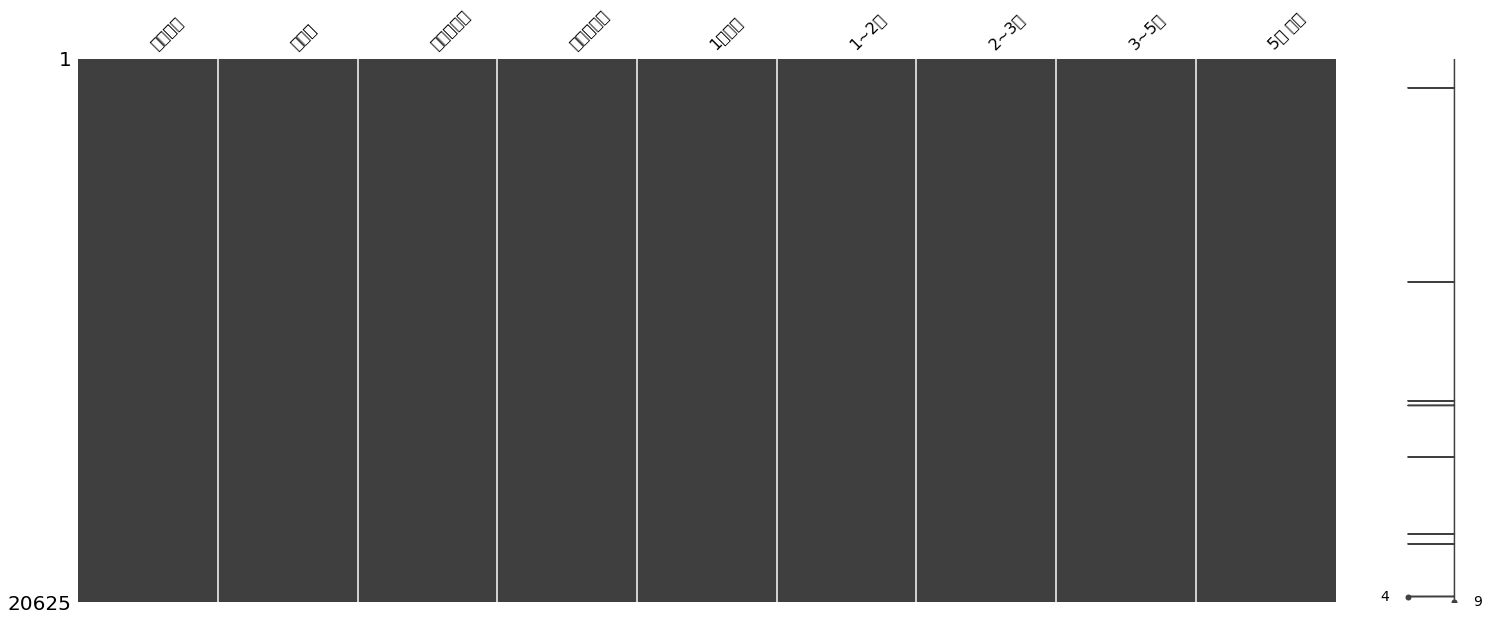

In [16]:
mino.matrix(data_raw)

### missingno를 사용해서 확인해준다

In [20]:
data_raw.isna().all() # True False인지 확인

광역시도     False
시군구      False
업종대분류    False
업종중분류    False
1년미만     False
1~2년     False
2~3년     False
3~5년     False
5년 이상    False
dtype: bool

In [21]:
data_raw.isna().any() #  True나온거는 적어도 하나의 NaN 있는 것.

광역시도     False
시군구      False
업종대분류    False
업종중분류    False
1년미만      True
1~2년      True
2~3년      True
3~5년      True
5년 이상     True
dtype: bool

#### 항상 없앨때는 DROP!

In [22]:
data_raw = data_raw.dropna()

#### Drop후 다시 melt하여 Wide -> long타입으로 바꿔줌

In [23]:
data = data_raw.melt(data.columns[:4], var_name = 'year', value_name = "수")

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103085 entries, 0 to 103084
Data columns (total 6 columns):
광역시도     103085 non-null object
시군구      103085 non-null object
업종대분류    103085 non-null object
업종중분류    103085 non-null object
year     103085 non-null object
수        103085 non-null float64
dtypes: float64(1), object(5)
memory usage: 4.7+ MB


##### 수가 float64라서 int64로 바꿔준다.

In [28]:
data['수'] = data['수'].astype('int64')

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103085 entries, 0 to 103084
Data columns (total 6 columns):
광역시도     103085 non-null object
시군구      103085 non-null object
업종대분류    103085 non-null object
업종중분류    103085 non-null object
year     103085 non-null object
수        103085 non-null int64
dtypes: int64(1), object(5)
memory usage: 4.7+ MB


##### 수가 0인거는 필요없어보인다. 그 이유는 melt해서 나온 거이므로 의미없다.

In [34]:
data = data[data['수']!=0]

##### 광역시도를 그룹지어서 몇 개 있는가 추출

In [37]:
data.groupby('광역시도').count()

,시군구,업종대분류,업종중분류,year,수
광역시도,,,,,
강원도,5691,5691,5691,5691,5691
경기도,12257,12257,12257,12257,12257
경상남도,5605,5605,5605,5605,5605
경상북도,6664,6664,6664,6664,6664
광주광역시,2058,2058,2058,2058,2058
대구광역시,3112,3112,3112,3112,3112
대전광역시,2040,2040,2040,2040,2040
부산광역시,5754,5754,5754,5754,5754
서울특별시,9933,9933,9933,9933,9933


##### 광역시도에서 업종중분류가 연극/영화/극장인 걸 찾아서 묶어줌..

In [38]:
data[data.iloc[:,-3]=='연극/영화/극장'].groupby('광역시도').count()

,시군구,업종대분류,업종중분류,year,수
광역시도,,,,,
강원도,34,34,34,34,34
경기도,109,109,109,109,109
경상남도,41,41,41,41,41
경상북도,40,40,40,40,40
광주광역시,18,18,18,18,18
대구광역시,27,27,27,27,27
대전광역시,17,17,17,17,17
부산광역시,42,42,42,42,42
서울특별시,91,91,91,91,91


### 이러한 분석이 어글리게이션 분석 = 집계 분석
집계를 내서, 지도상에 그래프를 그리는거.<br>
단계 구분도

#### 서울시 구별로 부동산업이 몇개 잇나?

In [48]:
data[(data['광역시도']=='서울특별시') & (data['업종대분류']=='부동산')].groupby(['시군구','업종중분류']).count()

광역시도  업종대분류  year  수
시군구  업종중분류                         
강남구  부동산관련서비스     3      3     3  3
     부동산임대        5      5     5  5
     부동산중개        5      5     5  5
     분양           5      5     5  5
     평가/개발/관리     5      5     5  5
강동구  부동산관련서비스     4      4     4  4
     부동산임대        5      5     5  5
     부동산중개        5      5     5  5
     분양           3      3     3  3
     평가/개발/관리     3      3     3  3
강북구  부동산관련서비스     1      1     1  1
     부동산임대        4      4     4  4
     부동산중개        5      5     5  5
     분양           3      3     3  3
     평가/개발/관리     4      4     4  4
강서구  부동산관련서비스     3      3     3  3
     부동산임대        4      4     4  4
     부동산중개        5      5     5  5
     분양           5      5     5  5
     평가/개발/관리     5      5     5  5
관악구  부동산관련서비스     3      3     3  3
     부동산임대        3      3     3  3
     부동산중개        5      5     5  5
     분양           3      3     3  3
     평가/개발/관리     5      5     5  5
광진구  부동산관련서비스     3      3     3  3
     부동산임대        4      4     4  4
     부동산중개        5      5     5  5
     분양           3      3     3  3
     평가/개발/관리     3      3     3  3
...             ...    ...   ... ..
영등포구 부동산관련서비스     4      4     4  4
     부동산임대        4      4     4  4
     부동산중개        5      5     5  5
     분양           4      4     4  4
     평가/개발/관리     5      5     5  5
용산구  부동산관련서비스     2      2     2  2
     부동산임대        5      5     5  5
     부동산중개        5      5     5  5
     분양           3      3     3  3
     평가/개발/관리     4      4     4  4
은평구  부동산관련서비스     1      1     1  1
     부동산임대        4      4     4  4
     부동산중개        5      5     5  5
     분양           3      3     3  3
     평가/개발/관리     3      3     3  3
종로구  부동산관련서비스     2      2     2  2
     부동산임대        5      5     5  5
     부동산중개        5      5     5  5
     분양           3      3     3  3
     평가/개발/관리     5      5     5  5
중구   부동산관련서비스     3      3     3  3
     부동산임대        5      5     5  5
     부동산중개        5      5     5  5
     분양           3      3     3  3
     평가/개발/관리     5      5     5  5
중랑구  부동산관련서비스     2      2     2  2
     부동산임대        5      5     5  5
     부동산중개        5      5     5  5
     분양           2      2     2  2
     평가/개발/관리     3      3     3  3

[125 rows x 4 columns]

##### size는 missingdata 포함. count는 불포함!

# SAC 기법 (Split- Apply-Combine) = GroupBy
= groupby -> count (Apply) 자동적으로 리덕션이 되기 때문에 Combine할 필요 없기때문에 SAC이 있음. <br>
+ groupby는 이터레이터가 아니다.
+ for문에 쓸수 있다.

In [53]:
for i,j in data[(data['광역시도']=='서울특별시') & (data['업종대분류']=='부동산')].groupby(['시군구','업종중분류']):
    print(i,j)

('강남구', '부동산관련서비스')         광역시도  시군구 업종대분류     업종중분류   year    수
43286  서울특별시  강남구   부동산  부동산관련서비스   2~3년    2
63903  서울특별시  강남구   부동산  부동산관련서비스   3~5년    6
84520  서울특별시  강남구   부동산  부동산관련서비스  5년 이상  110
('강남구', '부동산임대')         광역시도  시군구 업종대분류  업종중분류   year    수
2055   서울특별시  강남구   부동산  부동산임대   1년미만    6
22672  서울특별시  강남구   부동산  부동산임대   1~2년    5
43289  서울특별시  강남구   부동산  부동산임대   2~3년   68
63906  서울특별시  강남구   부동산  부동산임대   3~5년   79
84523  서울특별시  강남구   부동산  부동산임대  5년 이상  168
('강남구', '부동산중개')         광역시도  시군구 업종대분류  업종중분류   year    수
2053   서울특별시  강남구   부동산  부동산중개   1년미만   68
22670  서울특별시  강남구   부동산  부동산중개   1~2년   63
43287  서울특별시  강남구   부동산  부동산중개   2~3년  473
63904  서울특별시  강남구   부동산  부동산중개   3~5년  368
84521  서울특별시  강남구   부동산  부동산중개  5년 이상  702
('강남구', '분양')         광역시도  시군구 업종대분류 업종중분류   year    수
2054   서울특별시  강남구   부동산    분양   1년미만    1
22671  서울특별시  강남구   부동산    분양   1~2년    2
43288  서울특별시  강남구   부동산    분양   2~3년  207
63905  서울특별시  강남구   부동산    분양   3~5년   44
84522  서울특별시  강남구   부동

('금천구', '평가/개발/관리')         광역시도  시군구 업종대분류     업종중분류   year   수
22206  서울특별시  금천구   부동산  평가/개발/관리   1~2년   7
42823  서울특별시  금천구   부동산  평가/개발/관리   2~3년   5
84057  서울특별시  금천구   부동산  평가/개발/관리  5년 이상  45
('노원구', '부동산관련서비스')         광역시도  시군구 업종대분류     업종중분류   year    수
62790  서울특별시  노원구   부동산  부동산관련서비스   3~5년    2
83407  서울특별시  노원구   부동산  부동산관련서비스  5년 이상  150
('노원구', '부동산임대')         광역시도  시군구 업종대분류  업종중분류   year   수
42172  서울특별시  노원구   부동산  부동산임대   2~3년  19
62789  서울특별시  노원구   부동산  부동산임대   3~5년  17
83406  서울특별시  노원구   부동산  부동산임대  5년 이상  33
('노원구', '부동산중개')         광역시도  시군구 업종대분류  업종중분류   year    수
936    서울특별시  노원구   부동산  부동산중개   1년미만   13
21553  서울특별시  노원구   부동산  부동산중개   1~2년   35
42170  서울특별시  노원구   부동산  부동산중개   2~3년   15
62787  서울특별시  노원구   부동산  부동산중개   3~5년   36
83404  서울특별시  노원구   부동산  부동산중개  5년 이상  221
('노원구', '분양')         광역시도  시군구 업종대분류 업종중분류   year  수
42171  서울특별시  노원구   부동산    분양   2~3년  3
62788  서울특별시  노원구   부동산    분양   3~5년  1
83405  서울특별시  노원구   부동산    분양  5년 이상  1
('노원구', 

('송파구', '부동산중개')         광역시도  시군구 업종대분류  업종중분류   year    수
2146   서울특별시  송파구   부동산  부동산중개   1년미만   45
22763  서울특별시  송파구   부동산  부동산중개   1~2년   25
43380  서울특별시  송파구   부동산  부동산중개   2~3년   64
63997  서울특별시  송파구   부동산  부동산중개   3~5년  222
84614  서울특별시  송파구   부동산  부동산중개  5년 이상  309
('송파구', '분양')         광역시도  시군구 업종대분류 업종중분류   year   수
2148   서울특별시  송파구   부동산    분양   1년미만   1
43382  서울특별시  송파구   부동산    분양   2~3년  25
63999  서울특별시  송파구   부동산    분양   3~5년   6
84616  서울특별시  송파구   부동산    분양  5년 이상   6
('송파구', '평가/개발/관리')         광역시도  시군구 업종대분류     업종중분류   year   수
2145   서울특별시  송파구   부동산  평가/개발/관리   1년미만   1
22762  서울특별시  송파구   부동산  평가/개발/관리   1~2년   2
43379  서울특별시  송파구   부동산  평가/개발/관리   2~3년   4
63996  서울특별시  송파구   부동산  평가/개발/관리   3~5년   7
84613  서울특별시  송파구   부동산  평가/개발/관리  5년 이상  42
('양천구', '부동산관련서비스')         광역시도  시군구 업종대분류     업종중분류   year   수
63160  서울특별시  양천구   부동산  부동산관련서비스   3~5년   5
83777  서울특별시  양천구   부동산  부동산관련서비스  5년 이상  83
('양천구', '부동산임대')         광역시도  시군구 업종대분류  업종중분류   year   수
13

##### groupby한 것을 for문 써서 언패킹형식으로 풀어서 돌린다.

##### value_counts는 Counter를 쓴 것 , Inplace는 파이썬에서 이미 쓰던 용어
+ value_counts는 dataframe에 적용을 못함.
+ 단 Nomallize = True 하면 전체 비율로 표현 됨.

In [55]:
ss = data['업종대분류']

In [59]:
ss.value_counts(True, False)

숙박          0.039121
음식          0.188450
소매          0.298266
관광/여가/오락    0.067283
부동산         0.042104
학문/교육       0.137662
생활서비스       0.198928
스포츠         0.028187
Name: 업종대분류, dtype: float64

## 기본적인 그래프 스타일 바꿀 수 있음.

##### plt.style.available로 쓸 수 있는 스타일 정할 수 있음.

In [60]:
import matplotlib.pyplot as plt
plt.style.available

['bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'Solarize_Light2',
 'tableau-colorblind10',
 '_classic_test']

In [62]:
plt.style.use('ggplot')

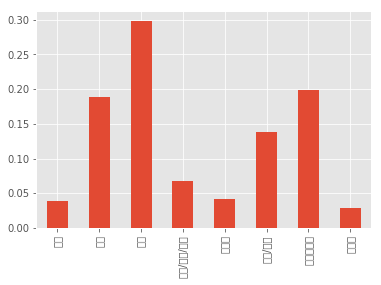

In [63]:
ss.value_counts(True, False).plot.bar()

### groupby를 동시에 두개하고 싶을때

In [64]:
t = data[(data['광역시도']=='서울특별시') & (data['업종대분류']=='부동산')].groupby(['시군구','업종중분류'])

In [65]:
import numpy as np

In [68]:
t.agg(['count', np.std])

수            
              count         std
시군구  업종중분류                     
강남구  부동산관련서비스     3   61.231800
     부동산임대        5   66.885723
     부동산중개        5  273.904545
     분양           5   85.963364
     평가/개발/관리     5  282.709745
강동구  부동산관련서비스     4   34.500000
     부동산임대        5    7.231874
     부동산중개        5  117.355017
     분양           3    2.081666
     평가/개발/관리     3   16.772994
강북구  부동산관련서비스     1         NaN
     부동산임대        4    3.403430
     부동산중개        5   24.263141
     분양           3    3.785939
     평가/개발/관리     4   19.551215
강서구  부동산관련서비스     3   80.541915
     부동산임대        4   16.268579
     부동산중개        5  100.231233
     분양           5    5.727128
     평가/개발/관리     5   50.147782
관악구  부동산관련서비스     3   35.510562
     부동산임대        3   14.364308
     부동산중개        5   84.662270
     분양           3    3.785939
     평가/개발/관리     5   13.535139
광진구  부동산관련서비스     3   30.022214
     부동산임대        4   14.651507
     부동산중개        5  128.002734
     분양           3   19.078784
     평가/개발/관리     3   50.229473
...             ...         ...
영등포구 부동산관련서비스     4   41.352146
     부동산임대        4   33.380383
     부동산중개        5   82.721219
     분양           4   18.625699
     평가/개발/관리     5   48.354938
용산구  부동산관련서비스     2   39.597980
     부동산임대        5   20.255863
     부동산중개        5   62.086230
     분양           3   10.785793
     평가/개발/관리     4   24.041631
은평구  부동산관련서비스     1         NaN
     부동산임대        4   11.445523
     부동산중개        5   51.143915
     분양           3    1.527525
     평가/개발/관리     3   20.550750
종로구  부동산관련서비스     2   15.556349
     부동산임대        5   13.754999
     부동산중개        5   34.705907
     분양           3   11.930353
     평가/개발/관리     5   45.871560
중구   부동산관련서비스     3    9.814955
     부동산임대        5   23.091124
     부동산중개        5   60.332413
     분양           3    5.859465
     평가/개발/관리     5   53.176122
중랑구  부동산관련서비스     2   48.083261
     부동산임대        5   10.158740
     부동산중개        5   45.754781
     분양           2    2.121320
     평가/개발/관리     3   33.201406

[125 rows x 2 columns]

### GROUPBY transform
숫자만 있으면 각각의 값을 변신 시킬 수 있다.

In [70]:
t.transform('count')

,광역시도,업종대분류,year,수
8,5,5,5,5
9,5,5,5,5
11,5,5,5,5
103,5,5,5,5
105,5,5,5,5
106,5,5,5,5
198,5,5,5,5
200,4,4,4,4
201,5,5,5,5
290,5,5,5,5


#### 파이썬에서는 OR가 나오면 isin 을 쓰면 됨.

In [75]:
t = data[(data['광역시도'].isin(['서울특별시','강원도'])) & (data['업종대분류']=='부동산')].groupby(['시군구','업종중분류'])

In [76]:
t.count()

광역시도  업종대분류  year  수
시군구 업종중분류                         
강남구 부동산관련서비스     3      3     3  3
    부동산임대        5      5     5  5
    부동산중개        5      5     5  5
    분양           5      5     5  5
    평가/개발/관리     5      5     5  5
강동구 부동산관련서비스     4      4     4  4
    부동산임대        5      5     5  5
    부동산중개        5      5     5  5
    분양           3      3     3  3
    평가/개발/관리     3      3     3  3
강릉시 부동산관련서비스     4      4     4  4
    부동산임대        5      5     5  5
    부동산중개        5      5     5  5
    분양           3      3     3  3
    평가/개발/관리     5      5     5  5
강북구 부동산관련서비스     1      1     1  1
    부동산임대        4      4     4  4
    부동산중개        5      5     5  5
    분양           3      3     3  3
    평가/개발/관리     4      4     4  4
강서구 부동산관련서비스     3      3     3  3
    부동산임대        4      4     4  4
    부동산중개        5      5     5  5
    분양           5      5     5  5
    평가/개발/관리     5      5     5  5
고성군 부동산관련서비스     2      2     2  2
    부동산임대        3      3     3  3
    부동산중개        4      4     4  4
    분양           3      3     3  3
관악구 부동산관련서비스     3      3     3  3
...            ...    ...   ... ..
철원군 평가/개발/관리     1      1     1  1
춘천시 부동산관련서비스     3      3     3  3
    부동산임대        4      4     4  4
    부동산중개        5      5     5  5
    분양           3      3     3  3
    평가/개발/관리     4      4     4  4
태백시 부동산관련서비스     2      2     2  2
    부동산임대        4      4     4  4
    부동산중개        2      2     2  2
    분양           2      2     2  2
    평가/개발/관리     3      3     3  3
평창군 부동산관련서비스     1      1     1  1
    부동산임대        3      3     3  3
    부동산중개        4      4     4  4
    분양           3      3     3  3
    평가/개발/관리     1      1     1  1
홍천군 부동산관련서비스     1      1     1  1
    부동산임대        3      3     3  3
    부동산중개        4      4     4  4
    분양           1      1     1  1
    평가/개발/관리     3      3     3  3
화천군 부동산관련서비스     1      1     1  1
    부동산임대        2      2     2  2
    부동산중개        3      3     3  3
    분양           1      1     1  1
횡성군 부동산관련서비스     1      1     1  1
    부동산임대        4      4     4  4
    부동산중개        5      5     5  5
    분양           2      2     2  2
    평가/개발/관리     2      2     2  2

[211 rows x 4 columns]

+ 여러개 조건이 있을때 isin 쓰면 됨. (predicate 함수로서 True, False로 돌려줌)
+ numpy where 씀

In [77]:
data.where(data['광역시도'].isin(['서울특별시','강원도']))

,광역시도,시군구,업종대분류,업종중분류,year,수
0,서울특별시,종로구,관광/여가/오락,연극/영화/극장,1년미만,1.0
7,서울특별시,종로구,관광/여가/오락,무도/유흥/가무,1년미만,1.0
8,서울특별시,종로구,부동산,부동산중개,1년미만,33.0
9,서울특별시,종로구,부동산,평가/개발/관리,1년미만,2.0
11,서울특별시,종로구,부동산,부동산임대,1년미만,1.0
13,서울특별시,종로구,생활서비스,기타서비스업,1년미만,3.0
14,서울특별시,종로구,생활서비스,광고/인쇄,1년미만,2.0
15,서울특별시,종로구,생활서비스,예식/의례/관혼상제,1년미만,3.0
18,서울특별시,종로구,생활서비스,법무세무회계,1년미만,5.0
19,서울특별시,종로구,생활서비스,행사/이벤트,1년미만,1.0


##### data.notna() 하면  Nan아닌 거 뽑을 수 있음.

## Groupby 3총사
+ pd.crosstab
+ 피벗 테이블 (엑셀)

In [89]:
pd.crosstab(data['year'], data['광역시도'], data['수'], aggfunc='count')

광역시도,강원도,경기도,경상남도,경상북도,광주광역시,대구광역시,대전광역시,부산광역시,서울특별시,세종특별자치시,울산광역시,인천광역시,전라남도,전라북도,제주특별자치도,충청남도,충청북도
year,,,,,,,,,,,,,,,,,
1~2년,779,2041,821,876,363,509,330,873,1718,68,268,553,847,607,131,684,527
1년미만,1023,2229,898,1136,383,574,365,1021,1728,73,320,606,1141,800,152,887,615
2~3년,1082,2502,1049,1260,418,632,437,1128,2090,89,362,753,1236,805,165,943,670
3~5년,1284,2687,1307,1539,439,686,451,1326,2158,86,405,827,1466,1019,174,1148,800
5년 이상,1523,2798,1530,1853,455,711,457,1406,2239,85,443,847,1810,1166,184,1307,931


## SCI
+ 스택은 칼럼을 인덱스로
+ 언스택은 인덱스로 칼럼으로

In [83]:
data.groupby(['year','광역시도']).count().unstack()

시군구                                                          ...  \
광역시도    강원도   경기도  경상남도  경상북도 광주광역시 대구광역시 대전광역시 부산광역시 서울특별시 세종특별자치시  ...   
year                                                                 ...   
1~2년    779  2041   821   876   363   509   330   873  1718      68  ...   
1년미만   1023  2229   898  1136   383   574   365  1021  1728      73  ...   
2~3년   1082  2502  1049  1260   418   632   437  1128  2090      89  ...   
3~5년   1284  2687  1307  1539   439   686   451  1326  2158      86  ...   
5년 이상  1523  2798  1530  1853   455   711   457  1406  2239      85  ...   

          수                                                           
광역시도  부산광역시 서울특별시 세종특별자치시 울산광역시 인천광역시  전라남도  전라북도 제주특별자치도  충청남도 충청북도  
year                                                                  
1~2년    873  1718      68   268   553   847   607     131   684  527  
1년미만   1021  1728      73   320   606  1141   800     152   887  615  
2~3년   1128  2090      89   362   753  1236   805     165   943  670  
3~5년   1326  2158      86   405   827  1466  1019     174  1148  800  
5년 이상  1406  2239      85   443   847  1810  1166     184  1307  931  

[5 rows x 68 columns]

##### pivot_table은 margins 이라는 게 있어서 부분합까지 알려줌.

In [87]:
data.pivot_table('수','year',aggfunc='count')

,수
year,
1~2년,11995
1년미만,13951
2~3년,15621
3~5년,17802
5년 이상,19745


### pdvega
+ grammer of graph : 문법만 잘 알면 쉽게 그릴 수 있다.

In [88]:
!pip install pdvega

  Stored in directory: C:\Users\seo\AppData\Local\pip\Cache\wheels\64\67\6c\3faafbf516d2bdfab7b3efc6e5db7dcf8dce060ea9da8fbe62
  Stored in directory: C:\Users\seo\AppData\Local\pip\Cache\wheels\bb\d1\fa\c1f13e071650f6dd9c6b986b7ee4d19dbfc7bc32a902593d39
Successfully built pdvega vega3


In [90]:
b = pd.crosstab(data['year'], data['광역시도'], data['수'], aggfunc='count')

In [91]:
import pdvega

##### 몽키패치때문에 vgplot이 나옴

C:\Users\seo\AppData\Local\Continuum\anaconda3\lib\site-packages\pdvega\_core.py:625: FutureWarning: A future version of pandas will default to `skipna=True`. To silence this warning, pass `skipna=True|False` explicitly.
  "type": infer_vegalite_type(df[x], ordinal_threshold=50)
C:\Users\seo\AppData\Local\Continuum\anaconda3\lib\site-packages\pdvega\_core.py:629: FutureWarning: A future version of pandas will default to `skipna=True`. To silence this warning, pass `skipna=True|False` explicitly.
  "type": infer_vegalite_type(df["value"], ordinal_threshold=0),
C:\Users\seo\AppData\Local\Continuum\anaconda3\lib\site-packages\pdvega\_core.py:634: FutureWarning: A future version of pandas will default to `skipna=True`. To silence this warning, pass `skipna=True|False` explicitly.
  "type": infer_vegalite_type(df["variable"])


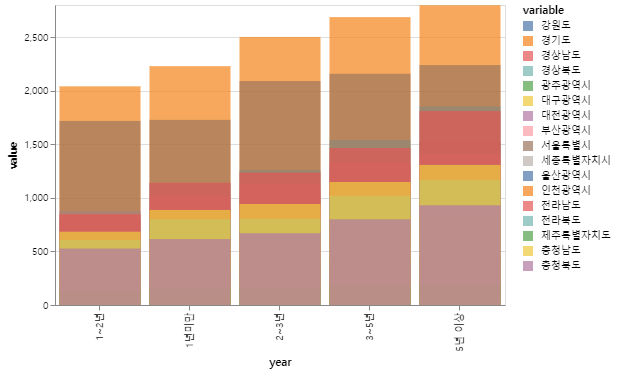

In [92]:
b.vgplot.bar()